In [1]:
import simpy
import networkx as nx
import random
import math
import matplotlib.pyplot as plt
import pygame
from pygame.locals import QUIT

pygame 2.5.2 (SDL 2.28.3, Python 3.11.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


## Basic PSO

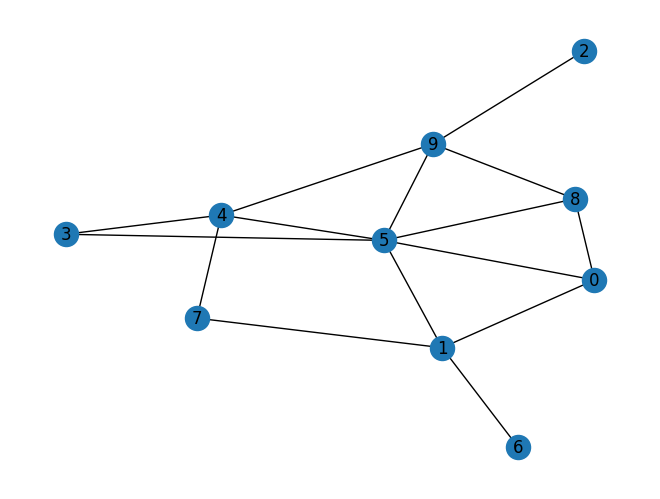

Best Sensor Node Configuration: [3, 5, 3, 5, 4, 5, 5, 4, 5, 3]


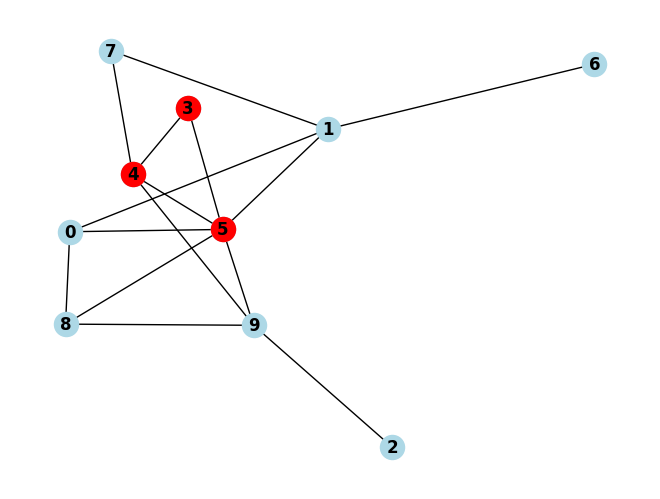

In [2]:
import simpy
import networkx as nx
import random
import math
import matplotlib.pyplot as plt

class Particle:
    def __init__(self, position, velocity):
        self.position = position
        self.velocity = velocity
        self.best_position = position
        self.best_fitness = float('inf')


def evaluate_fitness(position, graph):
    # Check if there is a valid path between all pairs of nodes in the current position
    for i in range(len(position)):
        for j in range(i + 1, len(position)):
            if not nx.has_path(graph, source=position[i], target=position[j]):
                print(f"No path between {position[i]} and {position[j]}")
                return float('inf')  # Return a large value to penalize invalid configurations

    # If all paths are valid, calculate the fitness
    fitness = sum(nx.shortest_path_length(graph, source=position[i], target=position[j]) for i in range(len(position)) for j in range(i + 1, len(position)))
    return fitness



def update_velocity(particle, global_best_position, inertia_weight, c1, c2):
    # PSO velocity update formula
    inertia_term = [inertia_weight * v for v in particle.velocity]
    cognitive_term = [c1 * random.random() * (bp - p) for bp, p in zip(particle.best_position, particle.position)]
    social_term = [c2 * random.random() * (gbp - p) for gbp, p in zip(global_best_position, particle.position)]

    new_velocity = [int(round(sum(v)) % len(particle.position)) for v in zip(inertia_term, cognitive_term, social_term)]
    return new_velocity


def particle_swarm_optimization(graph, num_particles, num_iterations, inertia_weight, c1, c2):
    particles = [Particle(position=[random.randint(0, graph.number_of_nodes() - 1) for _ in range(graph.number_of_nodes())],
                          velocity=[random.uniform(-1, 1) for _ in range(graph.number_of_nodes())]) for _ in range(num_particles)]

    global_best_position = min(particles, key=lambda x: evaluate_fitness(x.position, graph)).position

    for _ in range(num_iterations):
        for particle in particles:
            fitness = evaluate_fitness(particle.position, graph)
            if fitness < particle.best_fitness:
                particle.best_fitness = fitness
                particle.best_position = particle.position

            if fitness < evaluate_fitness(global_best_position, graph):
                global_best_position = particle.position

            new_velocity = update_velocity(particle, global_best_position, inertia_weight, c1, c2)
            particle.velocity = new_velocity

            # Update particle position
            particle.position = [int(round(pos + vel)) % graph.number_of_nodes() for pos, vel in zip(particle.position, new_velocity)]

    return global_best_position

def visualize_graph(graph, best_configuration):
    pos = nx.spring_layout(graph)  # You can choose a different layout algorithm based on your preference

    # Draw the original graph
    nx.draw(graph, pos, with_labels=True, node_color='lightblue', font_weight='bold')

    # Highlight the best configuration
    best_config_nodes = set(best_configuration)
    nx.draw_networkx_nodes(graph, pos, nodelist=best_config_nodes, node_color='red')

    # Display the plot
    plt.show()


def visualize_simulation(graph, num_particles, num_iterations, inertia_weight, c1, c2):

    # Set up the Pygame window
    screen = pygame.display.set_mode((800, 600))

    clock = pygame.time.Clock()

    # Run PSO algorithm
    particles = [Particle(position=[random.randint(0, graph.number_of_nodes() - 1) for _ in range(graph.number_of_nodes())],
                          velocity=[random.uniform(-1, 1) for _ in range(graph.number_of_nodes())]) for _ in range(num_particles)]

    global_best_position = min(particles, key=lambda x: evaluate_fitness(x.position, graph)).position

    for iteration in range(num_iterations):
        for event in pygame.event.get():
            if event.type == QUIT:
                pygame.quit()
                return

        for particle in particles:
            fitness = evaluate_fitness(particle.position, graph)
            if fitness < particle.best_fitness:
                particle.best_fitness = fitness
                particle.best_position = particle.position

            if fitness < evaluate_fitness(global_best_position, graph):
                global_best_position = particle.position

            new_velocity = update_velocity(particle, global_best_position, inertia_weight, c1, c2)
            particle.velocity = new_velocity

            # Update particle position
            particle.position = [int(round(pos + vel)) % graph.number_of_nodes() for pos, vel in zip(particle.position, new_velocity)]

        # Visualization
        screen.fill((255, 255, 255))  # White background

        pos = nx.spring_layout(graph, seed=42)
        nx.draw(graph, pos, with_labels=True, node_color='lightblue', font_weight='bold', ax=None)

        # Highlight the best configuration
        best_config_nodes = set(global_best_position)
        nx.draw_networkx_nodes(graph, pos, nodelist=best_config_nodes, node_color='red')


        # Display the plot
        plt.show()
        plt.pause(0.1)
        plt.clf()
        

def main():
    # Create a random graph for demonstration purposes
    random_graph = nx.erdos_renyi_graph(10, 0.3)
    # show the iniliazed graph using simpy
    nx.draw(random_graph, with_labels=True)
    plt.show()
    # Set simulation parameters
    num_particles = 10
    num_iterations = 50
    inertia_weight = 0.3
    c1 = 1.5  # cognitive parameter
    c2 = 1.5  # social parameter

    # Run PSO algorithm
    best_configuration = particle_swarm_optimization(random_graph, num_particles, num_iterations, inertia_weight, c1, c2)

    print("Best Sensor Node Configuration:", best_configuration)

    # Visualize the graph and best configuration
    visualize_graph(random_graph, best_configuration)
    # visualize_simulation(random_graph, num_particles, num_iterations, inertia_weight, c1, c2)


if __name__ == "__main__":
    main()


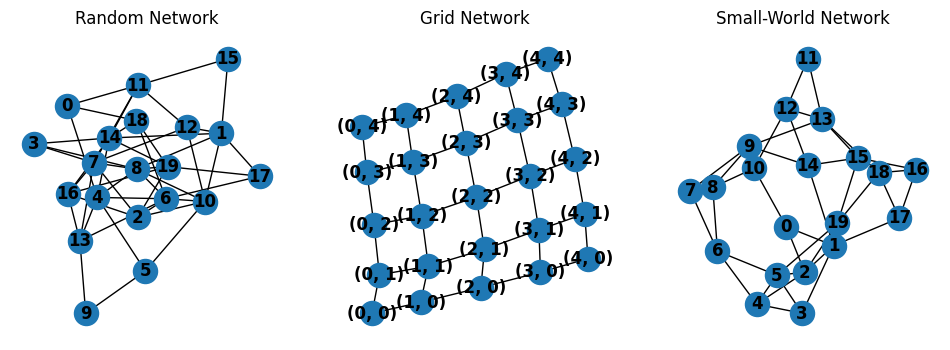

In [21]:
import networkx as nx
import matplotlib.pyplot as plt

# Step 1.1: Create a random network
random_network = nx.erdos_renyi_graph(n=20, p=0.2)

# Step 1.2: Create a grid network
grid_network = nx.grid_2d_graph(5, 5)

# Step 1.3: Create a small-world network
small_world_network = nx.watts_strogatz_graph(n=20, k=4, p=0.2)

# Step 1.4: Visualize the networks
plt.figure(figsize=(12, 4))

plt.subplot(131)
nx.draw(random_network, with_labels=True, font_weight='bold')
plt.title("Random Network")

plt.subplot(132)
nx.draw(grid_network, with_labels=True, font_weight='bold')
plt.title("Grid Network")

plt.subplot(133)
nx.draw(small_world_network, with_labels=True, font_weight='bold')
plt.title("Small-World Network")

plt.show()


In [22]:
# Step 2: Route Optimization Algorithms

def dijkstra_shortest_path(graph, source, target):
    shortest_path = nx.shortest_path(graph, source=source, target=target)
    return shortest_path

# Example usage on the random network
source_node = 0
target_node = 19

shortest_path_random = dijkstra_shortest_path(random_network, source_node, target_node)
print(f"Dijkstra's Shortest Path (Random Network): {shortest_path_random}")

# Similar usage for the grid and small-world networks
source_node = (0, 0)
target_node = (4, 4)
shortest_path_grid = dijkstra_shortest_path(grid_network, source_node, target_node)
print(f"Dijkstra's Shortest Path (Grid Network): {shortest_path_grid}")

source_node = 0
target_node = 19
shortest_path_small_world = dijkstra_shortest_path(small_world_network, source_node, target_node)
print(f"Dijkstra's Shortest Path (Small-World Network): {shortest_path_small_world}")



Dijkstra's Shortest Path (Random Network): [0, 18, 19]
Dijkstra's Shortest Path (Grid Network): [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4), (3, 4), (4, 4)]
Dijkstra's Shortest Path (Small-World Network): [0, 1, 19]


In [23]:
import networkx as nx
import matplotlib.pyplot as plt
import timeit

# Step 1: NetworkX Setup

# random_network = nx.erdos_renyi_graph(n=20, p=0.2)
# grid_network = nx.grid_2d_graph(5, 5)
# small_world_network = nx.watts_strogatz_graph(n=20, k=4, p=0.2)

# Step 2: Route Optimization Algorithms

def evaluate_algorithm(graph, source, target, algorithm_func):
    # Measure execution time
    start_time = timeit.default_timer()

    # Run the algorithm
    shortest_path = algorithm_func(graph, source, target)

    # Calculate path length
    path_length = nx.shortest_path_length(graph, source=source, target=target)

    # Calculate computational complexity (time taken)
    execution_time = timeit.default_timer() - start_time

    # Assess robustness (not implemented here, as it depends on specific use cases)

    return {
        "Shortest Path": shortest_path,
        "Path Length": path_length,
        "Computational Complexity": execution_time,
        # Add robustness metrics based on your specific criteria
    }

# def dijkstra_shortest_path(graph, source, target):
#     shortest_path = nx.shortest_path(graph, source=source, target=target)
#     return shortest_path

# Example usage on the random network
source_node_random = 0
target_node_random = 19

evaluation_random = evaluate_algorithm(random_network, source_node_random, target_node_random, dijkstra_shortest_path)
print("Evaluation (Random Network):", evaluation_random)

# Example usage on the grid network
source_node_grid = (0, 0)
target_node_grid = (4, 4)

evaluation_grid = evaluate_algorithm(grid_network, source_node_grid, target_node_grid, dijkstra_shortest_path)
print("Evaluation (Grid Network):", evaluation_grid)

# Example usage on the small-world network
source_node_small_world = 0
target_node_small_world = 19

evaluation_small_world = evaluate_algorithm(small_world_network, source_node_small_world, target_node_small_world, dijkstra_shortest_path)
print("Evaluation (Small-World Network):", evaluation_small_world)


Evaluation (Random Network): {'Shortest Path': [0, 18, 19], 'Path Length': 2, 'Computational Complexity': 4.7299981815740466e-05}
Evaluation (Grid Network): {'Shortest Path': [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4), (3, 4), (4, 4)], 'Path Length': 8, 'Computational Complexity': 0.00010900001507252455}
Evaluation (Small-World Network): {'Shortest Path': [0, 1, 19], 'Path Length': 2, 'Computational Complexity': 2.5500019546598196e-05}


In [1]:
import simpy
import networkx as nx
import random
import math
import matplotlib.pyplot as plt
import timeit

# Step 1: NetworkX Setup

random_network = nx.erdos_renyi_graph(n=20, p=0.2)
grid_network = nx.grid_2d_graph(5, 5)
small_world_network = nx.watts_strogatz_graph(n=20, k=4, p=0.2)

# Step 2: Particle Swarm Optimization Algorithm

class Particle:
    def __init__(self, position, velocity):
        self.position = position
        self.velocity = velocity
        self.best_position = position
        self.best_fitness = float('inf')


def evaluate_fitness(position, graph, source, target):
    # Calculate path length as the fitness function
    path_length = nx.shortest_path_length(graph, source=position[0], target=position[-1])
    return path_length


def update_velocity(particle, global_best_position, inertia_weight, c1, c2):
    particle_position_list = list(particle.position)
    particle_best_position_list = list(particle.best_position)
    global_best_position_list = list(global_best_position)

    inertia_term = [inertia_weight * v for v in particle.velocity]
    cognitive_term = [c1 * random.random() * (bp - p) for bp, p in zip(particle_best_position_list, particle_position_list)]
    social_term = [c2 * random.random() * (gbp - p) for gbp, p in zip(global_best_position_list, particle_position_list)]

    new_velocity = [inertia + cognitive + social for inertia, cognitive, social in zip(inertia_term, cognitive_term, social_term)]
    return new_velocity




def particle_swarm_optimization(graph, source, target, num_particles, num_iterations, inertia_weight, c1, c2):
    # Check if there is a path between the source and target
    if not nx.has_path(graph, source, target):
        print(f"No path between {source} and {target}.")
        return None

    particles = [Particle(position=[source, target], velocity=[random.uniform(-1, 1) for _ in range(2)]) for _ in range(num_particles)]


    global_best_position = min(particles, key=lambda x: evaluate_fitness(x.position, graph, source, target)).position

    for _ in range(num_iterations):
        for particle in particles:
            fitness = evaluate_fitness(particle.position, graph, source, target)
            if fitness < particle.best_fitness:
                particle.best_fitness = fitness
                particle.best_position = particle.position

            if fitness < evaluate_fitness(global_best_position, graph, source, target):
                global_best_position = particle.position

            new_velocity = update_velocity(particle, global_best_position, inertia_weight, c1, c2)
            particle.velocity = new_velocity

            # Update particle position
            particle.position = [int(round(pos + vel)) % len(graph.nodes) for pos, vel in zip(particle.position, new_velocity)]
            particle.position = [pos if isinstance(pos, int) else int(pos) for pos in particle.position]


    return global_best_position



# Step 3: Evaluate PSO Algorithm

def evaluate_pso_algorithm(graph, source, target, num_particles, num_iterations, inertia_weight, c1, c2):
    # Measure execution time
    start_time = timeit.default_timer()

    # Run PSO algorithm
    best_configuration = particle_swarm_optimization(graph, source, target, num_particles, num_iterations, inertia_weight, c1, c2)

    # Calculate path length
    path_length = nx.shortest_path_length(graph, source=best_configuration[0], target=best_configuration[-1])

    # Calculate computational complexity (time taken)
    execution_time = timeit.default_timer() - start_time

    # Assess robustness (not implemented here, as it depends on specific use cases)

    return {
        "Best Configuration": best_configuration,
        "Path Length": path_length,
        "Computational Complexity": execution_time,
        # Add robustness metrics based on your specific criteria
    }

# Example usage for PSO on the random network
pso_evaluation_random = evaluate_pso_algorithm(random_network, 0, 19, num_particles=10, num_iterations=50, inertia_weight=0.5, c1=1.5, c2=1.5)
print("PSO Evaluation (Random Network):", pso_evaluation_random)

# # Similar usage for the PSO on the grid and small-world networks
# pso_evaluation_grid = evaluate_pso_algorithm(grid_network, (0, 0), (4, 4), num_particles=10, num_iterations=50, inertia_weight=0.5, c1=1.5, c2=1.5)
# print("PSO Evaluation (Grid Network):", pso_evaluation_grid)

# pso_evaluation_small_world = evaluate_pso_algorithm(small_world_network, 0, 19, num_particles=10, num_iterations=50, inertia_weight=0.5, c1=1.5, c2=1.5)
# print("PSO Evaluation (Small-World Network):", pso_evaluation_small_world)


PSO Evaluation (Random Network): {'Best Configuration': [0, 19], 'Path Length': 3, 'Computational Complexity': 0.006318799976725131}


TypeError: unsupported operand type(s) for -: 'tuple' and 'tuple'

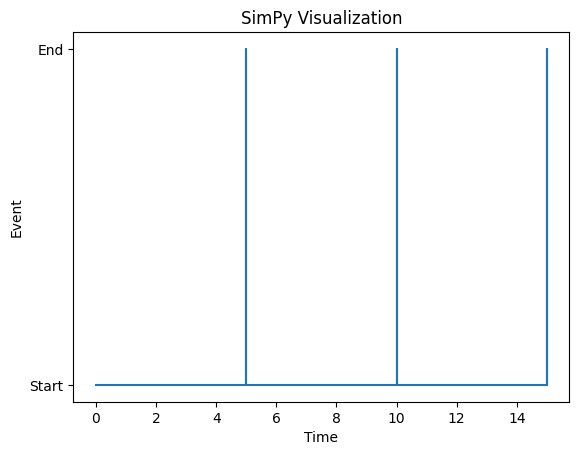

In [7]:
import simpy
import matplotlib.pyplot as plt

def example_process(env, data):
    while True:
        data.append((env.now, "Start"))
        yield env.timeout(5)
        data.append((env.now, "End"))

# Create a simulation environment
env = simpy.Environment()

# Create a list to store simulation data
simulation_data = []

# Start the example process in the simulation environment
env.process(example_process(env, simulation_data))

# Run the simulation for 20 time units
env.run(until=20)

# Visualize the simulation data using Matplotlib
timestamps, events = zip(*simulation_data)
plt.step(timestamps, events, where='post')
plt.xlabel('Time')
plt.ylabel('Event')
plt.title('SimPy Visualization')
plt.show()


In [19]:
import simpy
import networkx as nx
import random
import matplotlib.pyplot as plt

class Particle:
    def __init__(self, graph):
        self.graph = graph
        initial_node = random.choice(list(graph.nodes))
        self.position = [initial_node]
        self.velocity = random.uniform(0, 1)
        self.best_position = self.position.copy()
        self.best_fitness = float('inf')

    def update_position(self):
        new_position = self.position[-1] + self.velocity
        valid_nodes = list(self.graph.nodes)
        new_position = min(valid_nodes, key=lambda x: abs(x - round(new_position)))
        self.position.append(new_position)

def evaluate_path(path, graph):
    total_cost = sum(graph[path[i]][path[i+1]].get('weight', 0) for i in range(len(path) - 1))
    return total_cost


def pso_algorithm(env, num_particles, graph, num_iterations):
    particles = [Particle(graph) for _ in range(num_particles)]
    
    # Initialize global best path and fitness
    global_best_path = particles[0].position
    global_best_fitness = evaluate_path(global_best_path, graph)

    for _ in range(num_iterations):
        for particle in particles:
            particle.update_position()

            # Evaluate the fitness of the current path
            current_path = particle.position
            fitness = evaluate_path(current_path, graph)

            # Update personal best if necessary
            if fitness < particle.best_fitness:
                particle.best_fitness = fitness
                particle.best_position = current_path.copy()

            # Update global best if necessary
            if fitness < global_best_fitness:
                global_best_fitness = fitness
                global_best_path = current_path.copy()

        # Update simulation time
        yield env.timeout(1)

    return global_best_path

def visualize_path(graph, path):
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True)
    nx.draw_networkx_edges(graph, pos, edgelist=path, edge_color='r', width=2)
    plt.show()

def main():
    # Create a WSN graph using NetworkX
    G = nx.Graph()
    G.add_nodes_from(range(1, 6))
    G.add_edges_from([(1, 2, {'weight': 2}),
                      (1, 3, {'weight': 3}),
                      (2, 3, {'weight': 1}),
                      (2, 4, {'weight': 4}),
                      (3, 4, {'weight': 2}),
                      (3, 5, {'weight': 1}),
                      (4, 5, {'weight': 3})])

    # Check if the graph is fully connected
    if not nx.is_connected(G):
        print("The graph is not fully connected. Please modify the graph to ensure full connectivity.")
        return

    # SimPy simulation environment
    env = simpy.Environment()

    # Parameters
    num_particles = 5
    num_iterations = 10

    # Run PSO algorithm in SimPy environment
    env.process(pso_algorithm(env, num_particles, G, num_iterations))
    env.run()

    # Visualize the global best path
    global_best_path = pso_algorithm(env, num_particles, G, num_iterations)
    visualize_path(G, global_best_path)

if __name__ == "__main__":
    main()

# Why am i getting key error? Ans : because the graph is not fully connected.


KeyError: 4

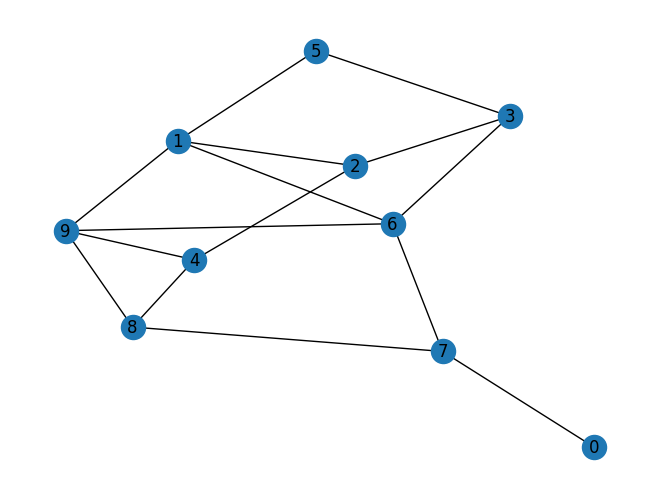

Simulation completed


In [25]:
import simpy
import networkx as nx
import random
import math
import matplotlib.pyplot as plt
import pygame
from pygame.locals import QUIT

class Particle:
    def __init__(self, position, velocity):
        self.position = position
        self.velocity = velocity
        self.best_position = position
        self.best_fitness = float('inf')

def evaluate_fitness(position, graph):
    # Check if there is a valid path between all pairs of nodes in the current position
    for i in range(len(position)):
        for j in range(i + 1, len(position)):
            if not nx.has_path(graph, source=position[i], target=position[j]):
                print(f"No path between {position[i]} and {position[j]}")
                return float('inf')  # Return a large value to penalize invalid configurations

    # If all paths are valid, calculate the fitness
    fitness = sum(nx.shortest_path_length(graph, source=position[i], target=position[j]) for i in range(len(position)) for j in range(i + 1, len(position)))
    return fitness

def update_velocity(particle, global_best_position, inertia_weight, c1, c2):
    # PSO velocity update formula
    inertia_term = [inertia_weight * v for v in particle.velocity]
    cognitive_term = [c1 * random.random() * (bp - p) for bp, p in zip(particle.best_position, particle.position)]
    social_term = [c2 * random.random() * (gbp - p) for gbp, p in zip(global_best_position, particle.position)]

    new_velocity = [int(round(sum(v)) % len(particle.position)) for v in zip(inertia_term, cognitive_term, social_term)]
    return new_velocity

def particle_swarm_optimization(graph, num_particles, num_iterations, inertia_weight, c1, c2, env):
    particles = [Particle(position=[random.randint(0, graph.number_of_nodes() - 1) for _ in range(graph.number_of_nodes())],
                          velocity=[random.uniform(-1, 1) for _ in range(graph.number_of_nodes())]) for _ in range(num_particles)]

    global_best_position = min(particles, key=lambda x: evaluate_fitness(x.position, graph)).position

    for _ in range(num_iterations):
        for particle in particles:
            fitness = evaluate_fitness(particle.position, graph)
            if fitness < particle.best_fitness:
                particle.best_fitness = fitness
                particle.best_position = particle.position

            if fitness < evaluate_fitness(global_best_position, graph):
                global_best_position = particle.position

            new_velocity = update_velocity(particle, global_best_position, inertia_weight, c1, c2)
            particle.velocity = new_velocity

            # Update particle position
            particle.position = [int(round(pos + vel)) % graph.number_of_nodes() for pos, vel in zip(particle.position, new_velocity)]

            # Yield a timeout event to simulate time passing
            yield env.timeout(1)

    return global_best_position

def visualize_graph(graph, best_configuration):
    pos = nx.spring_layout(graph)  # You can choose a different layout algorithm based on your preference

    # Draw the original graph
    nx.draw(graph, pos, with_labels=True, node_color='lightblue', font_weight='bold')

    # Highlight the best configuration
    best_config_nodes = set(best_configuration)
    nx.draw_networkx_nodes(graph, pos, nodelist=best_config_nodes, node_color='red')

    # Display the plot
    plt.show()

def main():
    # Create a random graph for demonstration purposes
    random_graph = nx.erdos_renyi_graph(10, 0.3)
    # Show the initialized graph using networkx
    nx.draw(random_graph, with_labels=True)
    plt.show()

    # Set simulation parameters
    num_particles = 10
    num_iterations = 50
    inertia_weight = 0.3
    c1 = 1.5  # cognitive parameter
    c2 = 1.5  # social parameter

    # Create a simpy environment
    env = simpy.Environment()

    # Run PSO algorithm in the simpy environment
    env.process(particle_swarm_optimization(random_graph, num_particles, num_iterations, inertia_weight, c1, c2, env))

    # Run the simulation
    env.run()

    print("Simulation completed")

if __name__ == "__main__":
    main()


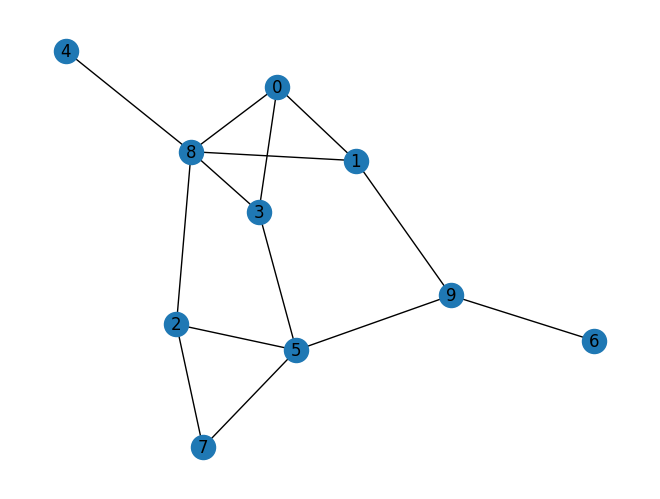

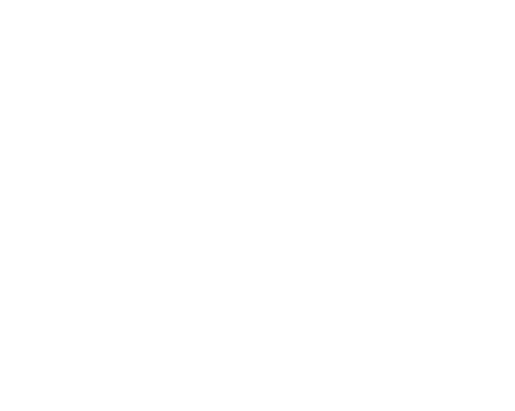

Simulation completed


In [31]:
import simpy
import networkx as nx
import random
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

class Particle:
    def __init__(self, position, velocity):
        self.position = position
        self.velocity = velocity
        self.best_position = position
        self.best_fitness = float('inf')

def evaluate_fitness(position, graph):
    # Check if there is a valid path between all pairs of nodes in the current position
    for i in range(len(position)):
        for j in range(i + 1, len(position)):
            if not nx.has_path(graph, source=position[i], target=position[j]):
                print(f"No path between {position[i]} and {position[j]}")
                return float('inf')  # Return a large value to penalize invalid configurations

    # If all paths are valid, calculate the fitness
    fitness = sum(nx.shortest_path_length(graph, source=position[i], target=position[j]) for i in range(len(position)) for j in range(i + 1, len(position)))
    return fitness

def update_velocity(particle, global_best_position, inertia_weight, c1, c2):
    # PSO velocity update formula
    inertia_term = [inertia_weight * v for v in particle.velocity]
    cognitive_term = [c1 * random.random() * (bp - p) for bp, p in zip(particle.best_position, particle.position)]
    social_term = [c2 * random.random() * (gbp - p) for gbp, p in zip(global_best_position, particle.position)]

    new_velocity = [int(round(sum(v)) % len(particle.position)) for v in zip(inertia_term, cognitive_term, social_term)]
    return new_velocity

def particle_swarm_optimization(graph, num_particles, num_iterations, inertia_weight, c1, c2, ax):
    particles = [Particle(position=[random.randint(0, graph.number_of_nodes() - 1) for _ in range(graph.number_of_nodes())],
                          velocity=[random.uniform(-1, 1) for _ in range(graph.number_of_nodes())]) for _ in range(num_particles)]

    global_best_position = min(particles, key=lambda x: evaluate_fitness(x.position, graph)).position

    def animate(iteration):
        nonlocal global_best_position

        for particle in particles:
            fitness = evaluate_fitness(particle.position, graph)
            if fitness < particle.best_fitness:
                particle.best_fitness = fitness
                particle.best_position = particle.position

            if fitness < evaluate_fitness(global_best_position, graph):
                global_best_position = particle.position

            new_velocity = update_velocity(particle, global_best_position, inertia_weight, c1, c2)
            particle.velocity = new_velocity

            # Update particle position
            particle.position = [int(round(pos + vel)) % graph.number_of_nodes() for pos, vel in zip(particle.position, new_velocity)]

        ax.clear()

        # Draw the original graph
        pos = nx.spring_layout(graph)
        nx.draw(graph, pos, with_labels=True, node_color='lightblue', font_weight='bold', ax=ax)

        # Highlight the best configuration
        best_config_nodes = set(global_best_position)
        nx.draw_networkx_nodes(graph, pos, nodelist=best_config_nodes, node_color='red', ax=ax)

        ax.set_title(f'Iteration {iteration}')

        return ax,

    # Run the animation
    ani = FuncAnimation(plt.gcf(), animate, frames=num_iterations, repeat=False, blit=True)
    plt.show()

def main():
    # Create a random graph for demonstration purposes
    random_graph = nx.erdos_renyi_graph(10, 0.3)
    # Show the initialized graph using networkx
    nx.draw(random_graph, with_labels=True)
    plt.show()

    # Set simulation parameters
    num_particles = 10
    num_iterations = 50
    inertia_weight = 0.3
    c1 = 1.5  # cognitive parameter
    c2 = 1.5  # social parameter

    # Set up matplotlib figure and axis for animation
    fig, ax = plt.subplots()

    # Run PSO algorithm with animation
    particle_swarm_optimization(random_graph, num_particles, num_iterations, inertia_weight, c1, c2, ax)

    print("Simulation completed")

if __name__ == "__main__":
    main()


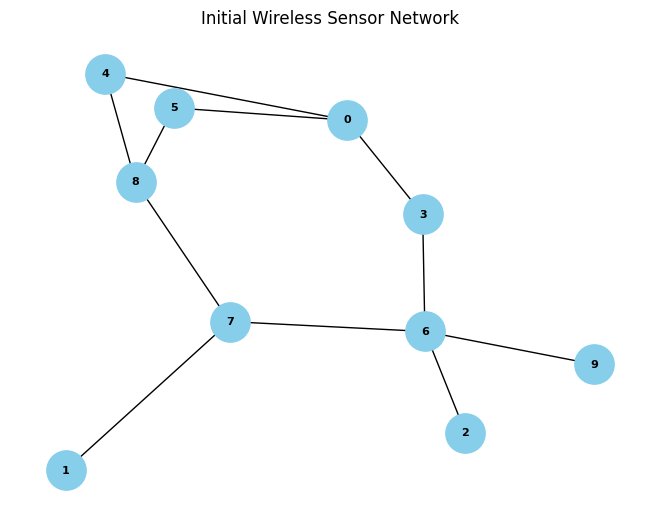

KeyError: 5

In [4]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np

# Create a random graph with 10 nodes
G = nx.erdos_renyi_graph(10, 0.3)

# Ensure start and end nodes are not directly connected
start_node = 0
end_node = 9
while end_node in G.neighbors(start_node):
    end_node = random.choice(range(10))

# Assign random weights to edges
for u, v in G.edges():
    G[u][v]['weight'] = random.randint(1, 10)

# Plot the initial graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='skyblue', node_size=800, font_size=8)
plt.title('Initial Wireless Sensor Network')
plt.show()

def calculate_fitness(route):
    total_weight = 0

    # Calculate the total weight (cost) of the given route
    for i in range(len(route) - 1):
        total_weight += G[route[i]][route[i + 1]]['weight']

    return total_weight
def update_position(current_position, velocity):
    new_position = [int(round(curr + vel)) for curr, vel in zip(current_position, velocity)]
    return new_position

# Particle Swarm Optimization (PSO) parameters
num_particles = 5
num_iterations = 10
alpha = 0.5  # Inertia weight
beta1 = 1.5  # Personal best weight
beta2 = 1.5  # Global best weight

# Initialize particles
particles = []
for _ in range(num_particles):
    particle = {'position': random.sample(range(10), 10)}
    particles.append(particle)

# Initialize personal best positions
p_best_positions = particles.copy()

# Initialize global best position
g_best_position = min(p_best_positions, key=lambda x: calculate_fitness(x['position']))


# PSO main loop
for iteration in range(num_iterations):
    print(f'\nIteration {iteration + 1}')

    for i, particle in enumerate(particles):
        # Update particle's velocity and position
        velocity = update_velocity(particle, p_best_positions[i], g_best_position)
        particle['position'] = update_position(particle['position'], velocity)

        # Ensure that the node indices are within bounds
        particle['position'] = [min(max(node, 0), len(G.nodes) - 1) for node in particle['position']]

        # Update personal best position
        if calculate_fitness(particle['position']) < calculate_fitness(p_best_positions[i]['position']):
            p_best_positions[i] = particle.copy()

        # Update global best position
        if calculate_fitness(p_best_positions[i]['position']) < calculate_fitness(g_best_position['position']):
            g_best_position = p_best_positions[i].copy()

        # Show current particle's position
        print(f'Particle {i + 1}: {particle["position"]} - Fitness: {calculate_fitness(particle["position"])}')

    # Show personal best positions
    print('Personal Best Positions:', [p['position'] for p in p_best_positions])

# Show the final optimal route
print('\nFinal Optimal Route:', g_best_position['position'])
print('Final Fitness:', calculate_fitness(g_best_position['position']))


# Plot the final optimal route
optimal_route = g_best_position['position']
optimal_edges = [(optimal_route[i], optimal_route[i + 1]) for i in range(len(optimal_route) - 1)]
optimal_edges = [(optimal_edges[-1][1], start_node)] + optimal_edges

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='skyblue', node_size=800, font_size=8)
nx.draw_networkx_edges(G, pos, edgelist=optimal_edges, edge_color='red', width=2)
plt.title('Optimal Route found by PSO')
plt.show()



Iteration 1
Error: 'velocity' key not present in the particle dictionary
Particle 1: [0, 8, 7, 1, 4, 6, 2, 9, 5, 3] - Fitness: 8
Error: 'velocity' key not present in the particle dictionary
Particle 2: [7, 1, 5, 0, 2, 8, 4, 3, 9, 6] - Fitness: 5
Error: 'velocity' key not present in the particle dictionary
Particle 3: [7, 9, 5, 6, 1, 8, 4, 2, 0, 3] - Fitness: 18
Error: 'velocity' key not present in the particle dictionary
Particle 4: [8, 1, 3, 7, 5, 2, 0, 9, 4, 6] - Fitness: 29
Error: 'velocity' key not present in the particle dictionary
Particle 5: [8, 2, 3, 0, 7, 4, 6, 1, 9, 5] - Fitness: 4
Personal Best Positions: [[0, 8, 7, 1, 4, 6, 2, 9, 5, 3], [7, 1, 5, 0, 2, 8, 4, 3, 9, 6], [7, 9, 5, 6, 1, 8, 4, 2, 0, 3], [8, 1, 3, 7, 5, 2, 0, 9, 4, 6], [8, 2, 3, 0, 7, 4, 6, 1, 9, 5]]

Iteration 2
Error: 'velocity' key not present in the particle dictionary
Particle 1: [0, 8, 7, 1, 4, 6, 2, 9, 5, 3] - Fitness: 8
Error: 'velocity' key not present in the particle dictionary
Particle 2: [7, 1, 5, 0

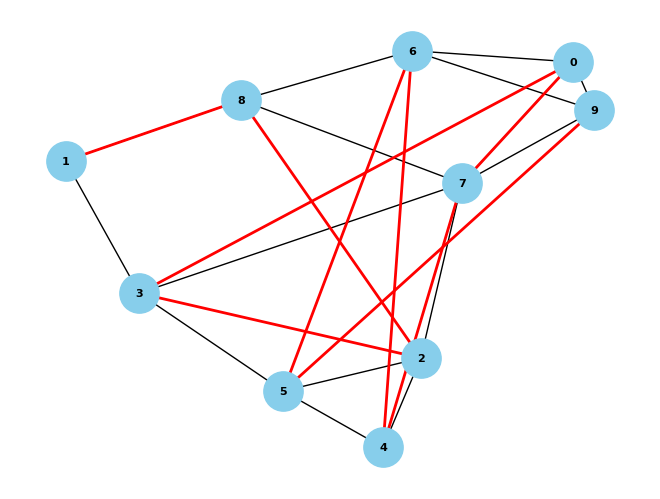

In [36]:
import random
import networkx as nx
import matplotlib.pyplot as plt

# Create a random graph with 10 nodes and make sure node 1 and 9 are not directly connected
G = nx.erdos_renyi_graph(10, 0.3)
while 9 in G.neighbors(1):
    G = nx.erdos_renyi_graph(10, 0.3)

# Assign random weights to edges
for u, v in G.edges():
    G[u][v]['weight'] = random.randint(1, 10)

# Display the graph with edge weights
pos = nx.spring_layout(G)

start_node = 1
end_node = 9
#Pso Implemetntation

def calculate_fitness(route):
    total_weight = 0

    # Calculate the total weight (cost) of the given route
    for i in range(len(route) - 1):
        u, v = route[i], route[i + 1]
        if G.has_edge(u, v) and 'weight' in G[u][v]:
            total_weight += G[u][v]['weight']
        # else:
        #     # Handle the case where the edge or 'weight' attribute is not present
        #     print(f"Edge or 'weight' attribute not present between nodes {u} and {v}")  

    return total_weight

def update_velocity(particle, p_best_position, g_best_position):
    # Check if 'velocity' key is present in the particle dictionary
    if 'velocity' in particle:
        # PSO velocity update formula
        inertia_term = [alpha * v for v in particle['velocity']]
        cognitive_term = [beta1 * random.random() * (bp - p) for bp, p in zip(p_best_position['position'], particle['position'])]
        social_term = [beta2 * random.random() * (gbp - p) for gbp, p in zip(g_best_position['position'], particle['position'])]

        new_velocity = [int(round(v)) for v in map(sum, zip(inertia_term, cognitive_term, social_term))]
        return new_velocity
    else:
        # Handle the case where 'velocity' key is not present
        print("Error: 'velocity' key not present in the particle dictionary")
        return [0] * len(p_best_position['position'])  # or return some default value


def update_position(current_position, velocity):
    new_position = [int(round(curr + vel)) for curr, vel in zip(current_position, velocity)]
    return new_position

# Particle Swarm Optimization (PSO) parameters
num_particles = 5
num_iterations = 10
alpha = 0.5  # Inertia weight
beta1 = 1.5  # Personal best weight
beta2 = 1.5  # Global best weight

# Initialize particles
particles = []
for _ in range(num_particles):
    particle = {'position': random.sample(range(10), 10)}
    particles.append(particle)

# Initialize personal best positions
p_best_positions = particles.copy()

# Initialize global best position
g_best_position = min(p_best_positions, key=lambda x: calculate_fitness(x['position']))

# PSO main loop

for iteration in range(num_iterations):
    print(f'\nIteration {iteration + 1}')

    for i, particle in enumerate(particles):
        # Update particle's velocity and position
        velocity = update_velocity(particle, p_best_positions[i], g_best_position)
        particle['position'] = update_position(particle['position'], velocity)

        # Ensure that the node indices are within bounds
        particle['position'] = [min(max(node, 0), len(G.nodes) - 1) for node in particle['position']]

        # Update personal best position
        if calculate_fitness(particle['position']) < calculate_fitness(p_best_positions[i]['position']):
            p_best_positions[i] = particle.copy()

        # Update global best position
        if calculate_fitness(p_best_positions[i]['position']) < calculate_fitness(g_best_position['position']):
            g_best_position = p_best_positions[i].copy()

        # Show current particle's position
        print(f'Particle {i + 1}: {particle["position"]} - Fitness: {calculate_fitness(particle["position"])}')

    # Show personal best positions
    print('Personal Best Positions:', [p['position'] for p in p_best_positions])


# Plot the final optimal route
optimal_route = [start_node] + g_best_position['position'] + [end_node]

# Remove start and end nodes from the middle of the route
optimal_route = [optimal_route[0]] + [node for node in optimal_route[1:-1] if node not in [start_node, end_node]] + [optimal_route[-1]]

# Show the final optimal route
print('\nFinal Optimal Route:', optimal_route)

# Plot the final optimal route
optimal_edges = [(optimal_route[i], optimal_route[i + 1]) for i in range(len(optimal_route) - 1)]

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='skyblue', node_size=800, font_size=8)
nx.draw_networkx_edges(G, pos, edgelist=optimal_edges, edge_color='red', width=2)

plt.show()

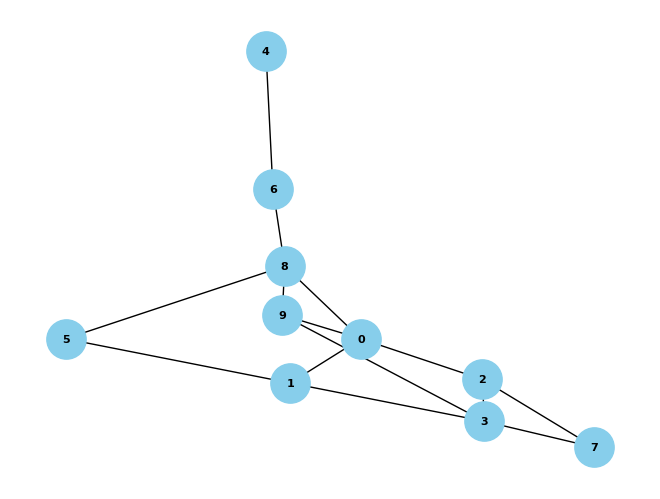

In [22]:
G = nx.erdos_renyi_graph(10, 0.3)
while 9 in G.neighbors(1):
    G = nx.erdos_renyi_graph(10, 0.3)

# Display the graph
# nx.draw(G, with_labels=True)

start_node = 1
end_node = 9

# Assign random weights to edges
for u, v in G.edges():
    G[u][v]['weight'] = random.randint(1, 10)

# Display the graph with edge weights
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='skyblue', node_size=800, font_size=8)

In [16]:
G[1]

AtlasView({0: {'weight': 3}})

In [17]:
# Assuming G is your graph
weight_value = G[0][9]['weight']
print(weight_value)


4



Iteration 1
Error: 'velocity' key not present in the particle dictionary
Particle 1: [3, 9, 6, 4, 8, 0, 1, 5, 7, 2] - Fitness: 9
Error: 'velocity' key not present in the particle dictionary
Particle 2: [8, 4, 6, 5, 3, 9, 1, 0, 7, 2] - Fitness: 20
Error: 'velocity' key not present in the particle dictionary
Particle 3: [4, 9, 2, 0, 6, 1, 8, 5, 3, 7] - Fitness: 24
Error: 'velocity' key not present in the particle dictionary
Particle 4: [2, 8, 7, 1, 4, 0, 9, 6, 5, 3] - Fitness: 23
Error: 'velocity' key not present in the particle dictionary
Particle 5: [5, 3, 7, 1, 9, 6, 2, 8, 4, 0] - Fitness: 14
Personal Best Positions: [[3, 9, 6, 4, 8, 0, 1, 5, 7, 2], [8, 4, 6, 5, 3, 9, 1, 0, 7, 2], [4, 9, 2, 0, 6, 1, 8, 5, 3, 7], [2, 8, 7, 1, 4, 0, 9, 6, 5, 3], [5, 3, 7, 1, 9, 6, 2, 8, 4, 0]]

Iteration 2
Error: 'velocity' key not present in the particle dictionary
Particle 1: [3, 9, 6, 4, 8, 0, 1, 5, 7, 2] - Fitness: 9
Error: 'velocity' key not present in the particle dictionary
Particle 2: [8, 4, 6,

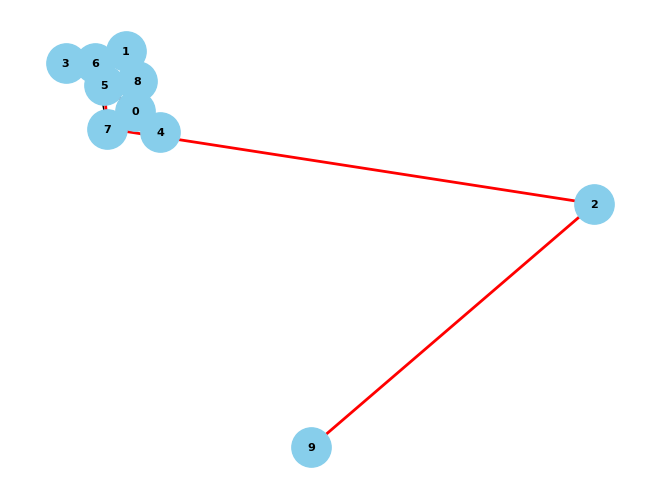

In [6]:
#Particle Swarm Optimization Algorithm
import random
import networkx as nx
import matplotlib.pyplot as plt

# Create a random graph with 10 nodes and make sure node 1 and 9 are not directly connected
G = nx.erdos_renyi_graph(10, 0.3)
while 9 in G.neighbors(1):
    G = nx.erdos_renyi_graph(10, 0.3)

# Assign random weights to edges
for u, v in G.edges():
    G[u][v]['weight'] = random.randint(1, 10)

# Display the graph with edge weights
pos = nx.spring_layout(G)

start_node = 1
end_node = 9
#Pso Implemetntation

def calculate_fitness(route):
    total_weight = 0

    # Calculate the total weight (cost) of the given route
    for i in range(len(route) - 1):
        u, v = route[i], route[i + 1]
        if G.has_edge(u, v) and 'weight' in G[u][v]:
            total_weight += G[u][v]['weight']
        
    return total_weight

def update_velocity(particle, p_best_position, g_best_position):
    # Check if 'velocity' key is present in the particle dictionary
    if 'velocity' in particle:
        # PSO velocity update formula
        inertia_term = [alpha * v for v in particle['velocity']]
        cognitive_term = [beta1 * random.random() * (bp - p) for bp, p in zip(p_best_position['position'], particle['position'])]
        social_term = [beta2 * random.random() * (gbp - p) for gbp, p in zip(g_best_position['position'], particle['position'])]

        new_velocity = [int(round(v)) for v in map(sum, zip(inertia_term, cognitive_term, social_term))]
        return new_velocity
    else:
        # Handle the case where 'velocity' key is not present
        print("Error: 'velocity' key not present in the particle dictionary")
        return [0] * len(p_best_position['position'])  # or return some default value


def update_position(current_position, velocity):
    new_position = [int(round(curr + vel)) for curr, vel in zip(current_position, velocity)]
    return new_position

# Particle Swarm Optimization (PSO) parameters
num_particles = 5
num_iterations = 10
alpha = 0.5  # Inertia weight
beta1 = 1.5  # Personal best weight
beta2 = 1.5  # Global best weight

# Initialize particles
particles = []
for _ in range(num_particles):
    particle = {'position': random.sample(range(10), 10)}
    particles.append(particle)

# Initialize personal best positions
p_best_positions = particles.copy()

# Initialize global best position
g_best_position = min(p_best_positions, key=lambda x: calculate_fitness(x['position']))

# PSO main loop

for iteration in range(num_iterations):
    print(f'\nIteration {iteration + 1}')

    for i, particle in enumerate(particles):
        # Update particle's velocity and position
        velocity = update_velocity(particle, p_best_positions[i], g_best_position)
        particle['position'] = update_position(particle['position'], velocity)

        # Ensure that the node indices are within bounds
        particle['position'] = [min(max(node, 0), len(G.nodes) - 1) for node in particle['position']]

        # Update personal best position
        if calculate_fitness(particle['position']) < calculate_fitness(p_best_positions[i]['position']):
            p_best_positions[i] = particle.copy()

        # Update global best position
        if calculate_fitness(p_best_positions[i]['position']) < calculate_fitness(g_best_position['position']):
            g_best_position = p_best_positions[i].copy()

        # Show current particle's position
        print(f'Particle {i + 1}: {particle["position"]} - Fitness: {calculate_fitness(particle["position"])}')

    # Show personal best positions
    print('Personal Best Positions:', [p['position'] for p in p_best_positions])


# Plot the final optimal route
optimal_route = [start_node] + g_best_position['position'] + [end_node]

# Remove start and end nodes from the middle of the route
optimal_route = [optimal_route[0]] + [node for node in optimal_route[1:-1] if node not in [start_node, end_node]] + [optimal_route[-1]]

# Show the final optimal route
print('\nFinal Optimal Route:', optimal_route)

# Plot the final optimal route
optimal_edges = [(optimal_route[i], optimal_route[i + 1]) for i in range(len(optimal_route) - 1)]

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='skyblue', node_size=800, font_size=8)
nx.draw_networkx_edges(G, pos, edgelist=optimal_edges, edge_color='red', width=2)

plt.show()

In [28]:
#Jaski code 2(energy vala, dekhlo error theek kar paa rahe ho to pls-kuch tuple list ki problem aa rahi hai apply_mutation fn me, lists are unhashable aur tuple banao to ,kuch aur problem  :/ )
import random
import matplotlib.pyplot as plt
import networkx as nx

class AOMDVGA:
    def __init__(self, graph, residual_energy, L, B, Pc, Pm, Er, Nc, Oc, Pn):
        self.graph = graph
        self.residual_energy = residual_energy
        self.L = L
        self.B = B
        self.Pc = Pc
        self.Pm = Pm
        self.Er = Er
        self.Nc = Nc
        self.Oc = Oc
        self.Pn = Pn
        self.population_size = 10  # Adjust as needed
        self.population = self.initialize_population()
        self.hc = 0  # Initialize hc, replace with your actual hop count

    def selection(self, population, fitness):
        # Add a small constant to each fitness value to avoid zero sum
        epsilon = 1e-6
        weights = [fit + epsilon for fit in fitness]

        # Select paths based on their fitness
        selected_paths = random.choices(population, weights=weights, k=len(population))
        return selected_paths

    def get_parent_route(self, routes):
        return random.choice(routes)

    def crossover(self, routes):
        new_routes = []

        for _ in range(len(routes)):
            parent1 = self.get_parent_route(routes)
            parent2 = self.get_parent_route(routes)

            crossover_point = random.randint(1, len(parent1) - 1)

            # Ensure that the child_route is a list of integers
            child_route = list(parent1[:crossover_point]) + [node for node in parent2 if node not in parent1[:crossover_point]]

            cost = self.calculate_fitness([(child_route, 0)])  # Cost is initially set to 0
            new_routes.append((child_route, cost))

        return new_routes

    def initialize_population(self):
        population = []
        all_nodes = set(self.graph.nodes())
        for _ in range(self.population_size):
            all_nodes_list = list(all_nodes)
            random.shuffle(all_nodes_list)
            path = all_nodes_list.copy()
            cost = self.calculate_fitness([(path, 0)])
            population.append((path, cost))
        return population

    def calculate_fitness(self, routes):
        fitness_values = []
        for route, _ in routes:
            # Convert route list to tuple before using it as a key
            route_tuple = tuple(route)
            cost = sum(self.graph[route_tuple[i]][route_tuple[i + 1]]['weight'] for i in range(len(route_tuple) - 1) if i + 1 < len(route_tuple) and route_tuple[i] in self.graph and route_tuple[i + 1] in self.graph[route_tuple[i]])
            fitness_values.append(cost)
        return fitness_values


    def mutation(self, routes, Pn, hc, Pm):
        
        mutated_routes = []
        for route, _ in routes:
            mutated_route = self.apply_mutation(route, Pn, hc, Pm)
            mutated_route = tuple(mutated_route)  # Convert list to tuple
            new_cost = self.calculate_fitness([(mutated_route, 0)])  # Cost is initially set to 0
            mutated_routes.append((mutated_route, new_cost))
        return mutated_routes

    def apply_mutation(self, route, Pn, hc, Pm):
        mutated_route = list(route)  # Convert tuple to list

        # Perform mutation
        for i in range(len(mutated_route)):
            if random.random() < Pn:
                mutated_route[i] = random.randint(0, 1)

        # Convert back to tuple
        mutated_route = tuple(mutated_route)

        return mutated_route


    def update_hop_count(self, best_route):
        # Update the hop count based on the number of nodes to jump to reach the destination
        self.hc = len(best_route) - 1

    def optimize(self, generations, visualize_interval):
        all_nodes = set(self.graph.nodes())

        for generation in range(1, generations + 1):
            print(f"\n--- Generation {generation} ---")

            fitness = self.calculate_fitness(self.population)
            if not self.population:
                print("Error: Population is empty.")
                return None

            selected_paths = self.selection(self.population, fitness)
            if not selected_paths:
                print("Error: Selected paths are empty.")
                return None
            print("Selected Paths:", selected_paths)

            new_paths = self.crossover(selected_paths)
            if not new_paths:
                print("Error: New paths are empty.")
                return None
            print("New Paths:", new_paths)

            mutated_paths = self.mutation(new_paths, self.Pn, self.hc, self.Pm)
            self.population = mutated_paths

            if not self.population:
                print("Error: Population is empty after mutation.")
                return None
            print("Mutated Paths:", mutated_paths)

            # Check if any path covers all nodes
            optimum_path = self.find_optimum_path(all_nodes)
            if optimum_path:
                return optimum_path

            # Update the hop count
            best_route = max(self.population, key=lambda x: x[1])[0]
            self.update_hop_count(best_route)

            # Visualize the best path every visualize_interval generations
            if generation % visualize_interval == 0:
                best_path = max(self.population, key=lambda x: x[1])[0]
                title = f"Generation {generation} - Best Path: {best_path}, Cost: {max(self.population, key=lambda x: x[1])[1]}, Hop Count: {self.hc}"
                # self.visualize_graph(best_path, title)

        if not self.population:
            print("Error: Population is empty after all generations.")
            return None

        best_path = max(self.population, key=lambda x: x[1])[0]
        return best_path

    
        

    def find_optimum_path(self, all_nodes):
        # Implementation to find the optimum path, replace it with your own logic
        return None

# Example Usage:

# Replace this with your actual graph creation logic
G = nx.complete_graph(10)
for edge in G.edges():
    G[edge[0]][edge[1]]['weight'] = random.randint(1, 10)

residual_energy = 0
L = 5
B = 0
Pc = 0.8
Pm = 0.2
Er = []
Nc = None
Oc = None
Pn = 0.1

aomdv_ga = AOMDVGA(G, residual_energy, L, B, Pc, Pm, Er, Nc, Oc, Pn)
efficient_route = aomdv_ga.optimize(generations=5, visualize_interval=1)
print("Efficient Route:", efficient_route)


--- Generation 1 ---
Selected Paths: [([3, 7, 2, 9, 1, 0, 8, 5, 6, 4], [47]), ([1, 8, 6, 5, 2, 7, 0, 3, 4, 9], [38]), ([2, 0, 3, 7, 4, 6, 8, 1, 5, 9], [60]), ([2, 0, 3, 7, 4, 6, 8, 1, 5, 9], [60]), ([3, 1, 7, 0, 5, 8, 6, 4, 2, 9], [50]), ([0, 8, 7, 6, 3, 9, 5, 4, 1, 2], [62]), ([3, 1, 7, 0, 5, 8, 6, 4, 2, 9], [50]), ([3, 7, 2, 9, 1, 0, 8, 5, 6, 4], [47]), ([3, 7, 2, 9, 1, 0, 8, 5, 6, 4], [47]), ([0, 5, 1, 4, 3, 2, 9, 6, 7, 8], [47])]
New Paths: [([[3, 7, 2, 9, 1, 0, 8, 5, 6, 4], [3, 1, 7, 0, 5, 8, 6, 4, 2, 9], [50]], [0]), ([[3, 1, 7, 0, 5, 8, 6, 4, 2, 9], [2, 0, 3, 7, 4, 6, 8, 1, 5, 9], [60]], [0]), ([[3, 7, 2, 9, 1, 0, 8, 5, 6, 4], [47]], [0]), ([[3, 7, 2, 9, 1, 0, 8, 5, 6, 4], [47]], [0]), ([[3, 1, 7, 0, 5, 8, 6, 4, 2, 9], [3, 7, 2, 9, 1, 0, 8, 5, 6, 4], [47]], [0]), ([[2, 0, 3, 7, 4, 6, 8, 1, 5, 9], [3, 1, 7, 0, 5, 8, 6, 4, 2, 9], [50]], [0]), ([[3, 7, 2, 9, 1, 0, 8, 5, 6, 4], [0, 8, 7, 6, 3, 9, 5, 4, 1, 2], [62]], [0]), ([[2, 0, 3, 7, 4, 6, 8, 1, 5, 9], [60]], [0]), ([[3, 7, 2, 9

TypeError: unhashable type: 'list'

In [29]:
## Implemetnation of Genetic Algorithm for AOMDV
import random
import matplotlib.pyplot as plt
import networkx as nx

class AOMDVGA:
    def __init__(self, graph, residual_energy, L, B, Pc, Pm, Er, Nc, Oc, Pn):
        self.graph = graph
        self.residual_energy = residual_energy
        self.L = L
        self.B = B
        self.Pc = Pc
        self.Pm = Pm
        self.Er = Er
        self.Nc = Nc
        self.Oc = Oc
        self.Pn = Pn
        self.population_size = 10  # Adjust as needed
        self.population = self.initialize_population()
        self.hc = 0  # Initialize hc, replace with your actual hop count

    def selection(self, population, fitness):
        # Add a small constant to each fitness value to avoid zero sum
        epsilon = 1e-6
        weights = [fit + epsilon for fit in fitness]

        # Select paths based on their fitness
        selected_paths = random.choices(population, weights=weights, k=len(population))
        return selected_paths

    def get_parent_route(self, routes):
        return random.choice(routes)

    def crossover(self, routes):
        new_routes = []

        for _ in range(len(routes)):
            parent1 = self.get_parent_route(routes)
            parent2 = self.get_parent_route(routes)

            crossover_point = random.randint(1, len(parent1) - 1)

            # Ensure that the child_route is a list of integers
            child_route = list(parent1[:crossover_point]) + [node for node in parent2 if node not in parent1[:crossover_point]]
            



--- Generation 1 ---
Selected Paths: [([2, 4, 0, 1, 8, 3, 9, 6, 7, 5], [54]), ([5, 4, 0, 7, 3, 2, 9, 8, 6, 1], [36]), ([6, 3, 5, 1, 9, 8, 4, 0, 7, 2], [42]), ([2, 6, 5, 4, 9, 0, 1, 8, 7, 3], [43]), ([5, 4, 0, 7, 3, 2, 9, 8, 6, 1], [36])]
New Paths: [([[2, 6, 5, 4, 9, 0, 1, 8, 7, 3], [43]], [0]), ([[5, 4, 0, 7, 3, 2, 9, 8, 6, 1], [2, 6, 5, 4, 9, 0, 1, 8, 7, 3], [43]], [0]), ([[5, 4, 0, 7, 3, 2, 9, 8, 6, 1], [2, 6, 5, 4, 9, 0, 1, 8, 7, 3], [43]], [0]), ([[5, 4, 0, 7, 3, 2, 9, 8, 6, 1], [6, 3, 5, 1, 9, 8, 4, 0, 7, 2], [42]], [0]), ([[2, 6, 5, 4, 9, 0, 1, 8, 7, 3], [43]], [0])]
Mutated Paths: [(([2, 6, 5, 4, 9, 0, 1, 8, 7, 3], [43]), [0]), (([5, 4, 0, 7, 3, 2, 9, 8, 6, 1], [2, 6, 5, 4, 9, 0, 1, 8, 7, 3], [43]), [0]), (([5, 4, 0, 7, 3, 2, 9, 8, 6, 1], [2, 6, 5, 4, 9, 0, 1, 8, 7, 3], [43]), [0]), (([5, 4, 0, 7, 3, 2, 9, 8, 6, 1], [6, 3, 5, 1, 9, 8, 4, 0, 7, 2], [42]), [0]), (([2, 6, 5, 4, 9, 0, 1, 8, 7, 3], [43]), [0])]


NetworkXError: Node (2, 6, 5, 4, 9, 0, 1, 8, 7, 3) has no position.

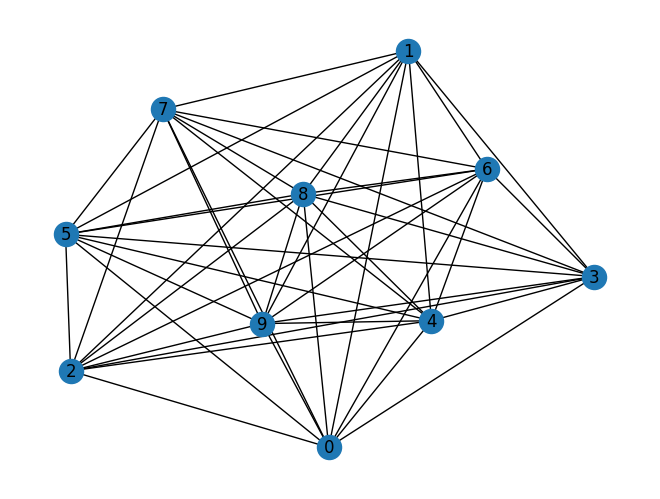

In [35]:
#Jaski code 2(energy vala, dekhlo error theek kar paa rahe ho to pls-kuch tuple list ki problem aa rahi hai apply_mutation fn me, lists are unhashable aur tuple banao to ,kuch aur problem  :/ )
import random
import matplotlib.pyplot as plt
import networkx as nx

class AOMDVGA:
    def __init__(self, graph, residual_energy, L, B, Pc, Pm, Er, Nc, Oc, Pn):
        self.graph = graph
        self.residual_energy = residual_energy
        self.L = L
        self.B = B
        self.Pc = Pc
        self.Pm = Pm
        self.Er = Er
        self.Nc = Nc
        self.Oc = Oc
        self.Pn = Pn
        self.population_size = 5  # Adjust as needed
        self.population = self.initialize_population()
        self.hc = 0  # Initialize hc, replace with your actual hop count

    def selection(self, population, fitness):
        # Add a small constant to each fitness value to avoid zero sum
        epsilon = 1e-6
        weights = [fit + epsilon for fit in fitness]

        # Select paths based on their fitness
        selected_paths = random.choices(population, weights=weights, k=len(population))
        return selected_paths

    def get_parent_route(self, routes):
        return random.choice(routes)

    def crossover(self, routes):
        new_routes = []

        for _ in range(len(routes)):
            parent1 = self.get_parent_route(routes)
            parent2 = self.get_parent_route(routes)

            crossover_point = random.randint(1, len(parent1) - 1)

            # Ensure that the child_route is a list of integers
            child_route = list(parent1[:crossover_point]) + [node for node in parent2 if node not in parent1[:crossover_point]]

            cost = self.calculate_fitness([(child_route, 0)])  # Cost is initially set to 0
            new_routes.append((child_route, cost))

        return new_routes

    def initialize_population(self):
        population = []
        all_nodes = set(self.graph.nodes())
        for _ in range(self.population_size):
            all_nodes_list = list(all_nodes)
            random.shuffle(all_nodes_list)
            path = all_nodes_list.copy()
            cost = self.calculate_fitness([(path, 0)])
            population.append((path, cost))
        return population

    def calculate_fitness(self, routes):
        fitness_values = []
        for route, _ in routes:
            cost = sum(self.graph[route[i]][route[i + 1]]['weight'] for i in range(len(route) - 1) if i + 1 < len(route) and route[i] in self.graph and route[i + 1] in self.graph[route[i]])
            fitness_values.append(cost)
        return fitness_values

    def mutation(self, routes, Pn, hc, Pm):
        mutated_routes = []
        for route, _ in routes:
            mutated_route = self.apply_mutation(route, Pn, hc, Pm)
            new_cost = self.calculate_fitness([(mutated_route, 0)])  # Cost is initially set to 0
            mutated_routes.append((mutated_route, new_cost))
        return mutated_routes

    def apply_mutation(self, route, Pn, hc, Pm):
        mutated_route = list(route)  # Convert tuple to list

        # Remove the part where 0 is flipped to 1

        return tuple(mutated_route)  # Convert list back to tuple

    def update_hop_count(self, best_route):
        # Update the hop count based on the number of nodes to jump to reach the destination
        self.hc = len(best_route) - 1

    def optimize(self, generations, visualize_interval):
        all_nodes = set(self.graph.nodes())

        for generation in range(1, generations + 1):
            print(f"\n--- Generation {generation} ---")

            fitness = self.calculate_fitness(self.population)
            if not self.population:
                print("Error: Population is empty.")
                return None

            selected_paths = self.selection(self.population, fitness)
            if not selected_paths:
                print("Error: Selected paths are empty.")
                return None
            print("Selected Paths:", selected_paths)

            new_paths = self.crossover(selected_paths)
            if not new_paths:
                print("Error: New paths are empty.")
                return None
            print("New Paths:", new_paths)

            mutated_paths = self.mutation(new_paths, self.Pn, self.hc, self.Pm)
            self.population = mutated_paths

            if not self.population:
                print("Error: Population is empty after mutation.")
                return None
            print("Mutated Paths:", mutated_paths)

            # Check if any path covers all nodes
            optimum_path = self.find_optimum_path(all_nodes)
            if optimum_path:
                return optimum_path

            # Update the hop count
            best_route = max(self.population, key=lambda x: x[1])[0]
            self.update_hop_count(best_route)

            # Visualize the best path every visualize_interval generations
            if generation % visualize_interval == 0:
                best_path = max(self.population, key=lambda x: x[1])[0]
                title = f"Generation {generation} - Best Path: {best_path}, Cost: {max(self.population, key=lambda x: x[1])[1]}, Hop Count: {self.hc}"
                self.visualize_graph(best_path, title)

        if not self.population:
            print("Error: Population is empty after all generations.")
            return None

        best_path = max(self.population, key=lambda x: x[1])[0]
        return best_path

    def visualize_graph(self, path, title):
        # Visualization code, replace it with your own visualization logic
        G_copy = self.graph.copy()
        pos = nx.spring_layout(G_copy)
        nx.draw(G_copy, pos, with_labels=True)

        # Convert the elements of path to tuples
        path_nodes = [tuple(node) for node in path]

        nx.draw_networkx_nodes(G_copy, pos, nodelist=path_nodes, node_color='r')
        plt.title(title)
        plt.show()


    def find_optimum_path(self, all_nodes):
        # Implementation to find the optimum path, replace it with your own logic
        return None

# Example Usage:

# Replace this with your actual graph creation logic
G = nx.complete_graph(10)
for edge in G.edges():
    G[edge[0]][edge[1]]['weight'] = random.randint(1, 10)

residual_energy = 0
L = 5
B = 0
Pc = 0.8
Pm = 0.2
Er = []
Nc = None
Oc = None
Pn = 0.1

aomdv_ga = AOMDVGA(G, residual_energy, L, B, Pc, Pm, Er, Nc, Oc, Pn)
efficient_route = aomdv_ga.optimize(generations=5, visualize_interval=1)
print("Efficient Route:", efficient_route)